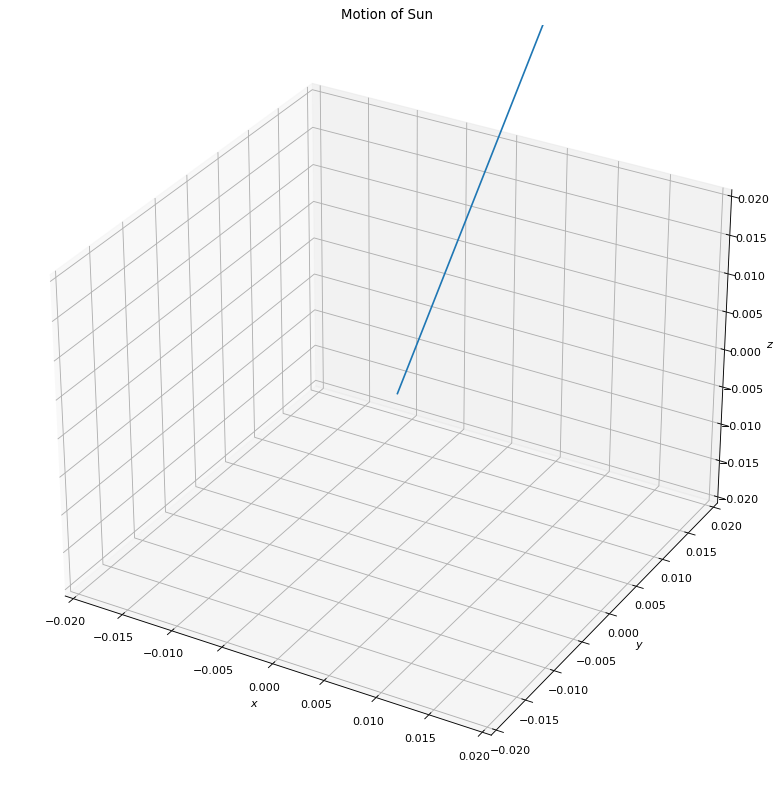

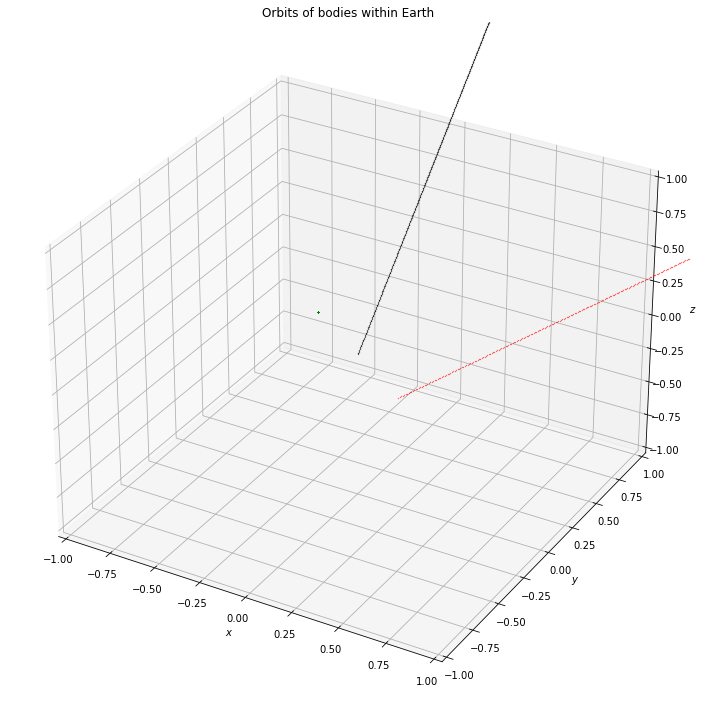

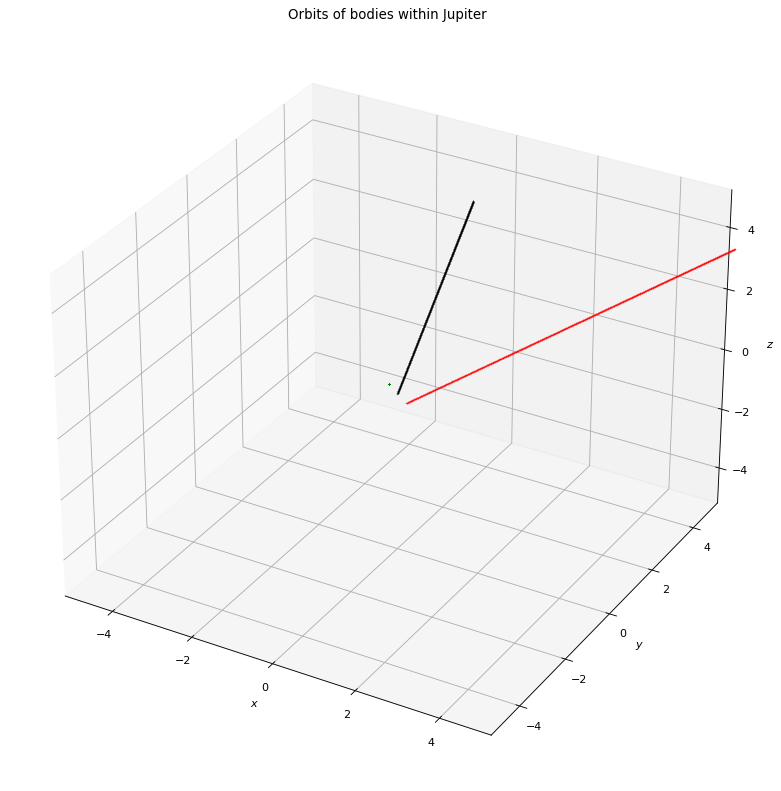

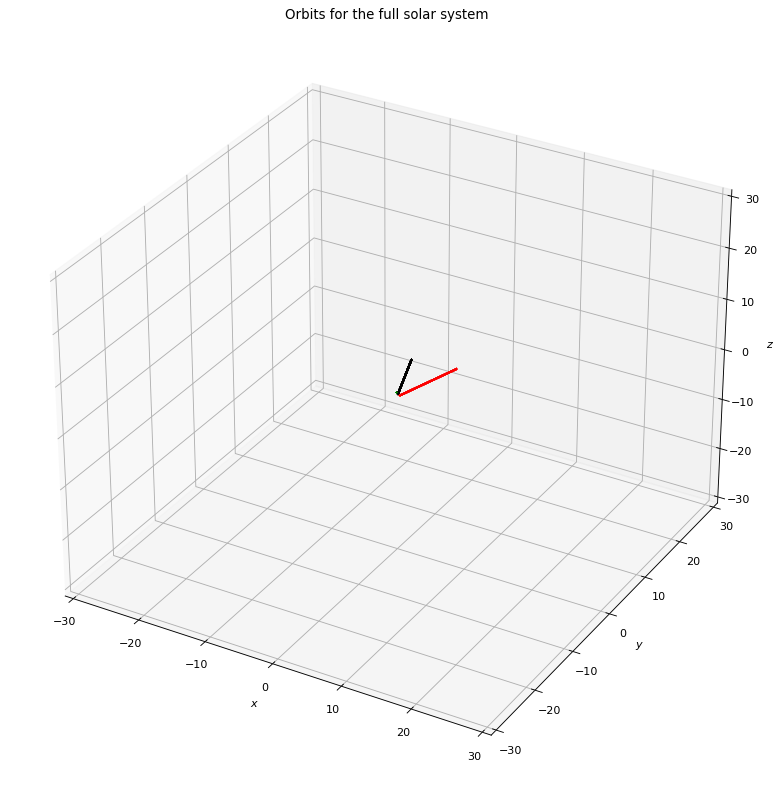

In [27]:
import csv
import numpy as np
import matplotlib.pyplot as plt

savefile = "data.csv"   #Rename to required output file

#Read in the .csv data file: 
file = open(savefile)
csvreader = csv.reader(file)
rows = []
for row in csvreader:
  rows.append(row)
file.close()

#Extract header information:
dt = float(rows[0][0]) 
T = int(rows[0][1])
Tsave = int(rows[0][2])
N = int(rows[0][3])
NumSave = int(np.ceil((T+1)/Tsave)) #Number of save entries

linesp = ['k.','r.','g.','b.','m.','c.','y.','k.','r.']

#Initialise storage for data:
pos = np.zeros([NumSave,N,3])
vel = np.zeros([NumSave,N,3])

#Extract and reshape the data:
data = np.zeros(3*N)

for i in range(NumSave):
      
  start = i*N + 1 #Beginning of save N=3
   
  #Vectors variables:
  for j in range(N):
    for k in range(3): 
      pos[i,j,k] = float(rows[start+j][k])
      vel[i,j,k] = float(rows[start+j][k+3])
      
#-------------------------------------------
#Plot the orbits of the Sun:
ax = plt.figure(figsize=(15,10),dpi=80).add_subplot(projection='3d')

for j in range(min(1,N)):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2])

ax.set_xlim([-2e-2,2e-2])
ax.set_ylim([-2e-2,2e-2])
ax.set_zlim([-2e-2,2e-2])
ax.set_title('Motion of Sun')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'motion_sun.png'
plt.savefig(figname, dpi=80, bbox_inches = 'tight')

plt.show()


#-------------------------------------------
#Plot the orbits for bodies within Earth's:
ax = plt.figure(figsize=(15,10)).add_subplot(projection='3d')

for j in range(min(4,N)):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2], linesp[j], markersize = 0.5)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_title('Orbits of bodies within Earth')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'orbits_closeup.png'
plt.savefig(figname, dpi=100, bbox_inches = 'tight')

plt.show()

#-------------------------------------------
#Plot the orbits for inner planets:
ax = plt.figure(figsize=(15,10),dpi=80).add_subplot(projection='3d')

for j in range(min(6,N)):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2], linesp[j], markersize = 0.5)

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
ax.set_title('Orbits of bodies within Jupiter')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'orbits_inner.png'
plt.savefig(figname, dpi=80, bbox_inches = 'tight')

plt.show()

#-------------------------------------------
#Plot the orbits on solar system scale:
ax = plt.figure(figsize=(15,10),dpi=80).add_subplot(projection='3d')

for j in range(N):
    ax.plot(pos[:,j,0], pos[:,j,1], pos[:,j,2], linesp[j], markersize = 0.5)

ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
ax.set_zlim([-30,30])
ax.set_title('Orbits for the full solar system')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

plt.tight_layout()

figname = 'orbits_solar_system.png'
plt.savefig(figname, dpi=80, bbox_inches = 'tight')

plt.show()